In [1]:
import numpy as np
import pandas as pd


### Reading file

In [2]:
# reading file
df = pd.read_excel("OnlineRetail.xlsx")
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Pre processing

In [3]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.shape


(541909, 8)

In [5]:
# trimming the data we needed
df = df.filter(items=['Quantity', 'UnitPrice', 'CustomerID'])
df.shape

(541909, 3)

In [6]:
# droping null values
df = df.dropna()
df.shape

(406829, 3)

In [7]:
# removing negative values
df = df[df['Quantity'] >= 0]
df.shape

(397924, 3)

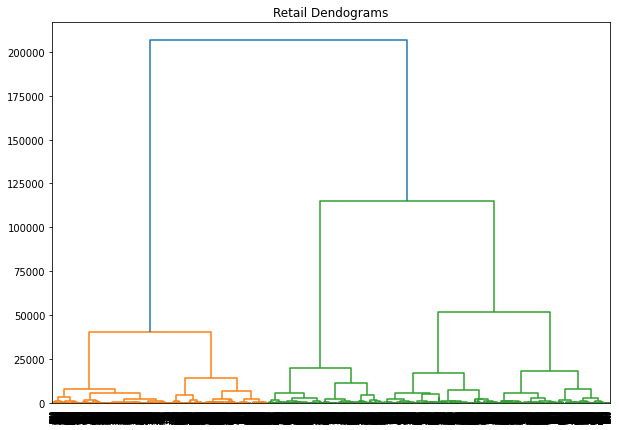

In [8]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline

#small data because of ram issue
data=df[:9999]

plt.figure(figsize=(10, 7))
plt.title("Retail Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [9]:
#scaling the data
from sklearn import preprocessing

ndarray=preprocessing.scale(df)
df=pd.DataFrame(ndarray, columns = ['Quantity','UnitPrice','CustomerID'])
df

,Quantity,UnitPrice,CustomerID
0,-0.038919,-0.025623,1.491789
1,-0.038919,0.012392,1.491789
2,-0.027834,-0.016571,1.491789
3,-0.038919,0.012392,1.491789
4,-0.038919,0.012392,1.491789
...,...,...,...
397919,-0.005664,-0.102557,-1.526012
397920,-0.038919,-0.045987,-1.526012
397921,-0.050005,0.046786,-1.526012
397922,-0.050005,0.046786,-1.526012


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,3.979240e+05,3.979240e+05,3.979240e+05
mean,7.142497e-19,6.785372e-19,-4.429777e-16
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.663244e-02,-1.410240e-01,-1.720973e+00
25%,-6.108981e-02,-8.445466e-02,-7.736050e-01
50%,-3.891932e-02,-5.277581e-02,-7.898536e-02
75%,-5.663581e-03,2.868409e-02,8.759708e-01
max,4.488526e+02,3.683632e+02,1.746872e+00


In [11]:
#changin the data type
df=df.astype(str)
df

,Quantity,UnitPrice,CustomerID
0,-0.03891932111736299,-0.025622510889540425,1.4917890364225226
1,-0.03891932111736299,0.012392111610136673,1.4917890364225226
2,-0.027834074547881046,-0.016571410294379207,1.4917890364225226
3,-0.03891932111736299,0.012392111610136673,1.4917890364225226
4,-0.03891932111736299,0.012392111610136673,1.4917890364225226
...,...,...,...
397919,-0.00566358140891717,-0.10255686594841071,-1.5260123880692094
397920,-0.03891932111736299,-0.04598748722865314,-1.5260123880692094
397921,-0.05000456768684493,0.046786293871749284,-1.5260123880692094
397922,-0.05000456768684493,0.046786293871749284,-1.5260123880692094


## KMean

In [12]:
#selecting small data because of RAM
df=df[:9999]

With 4 clusters

In [13]:
from sklearn.cluster import KMeans

#change n_clusters
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=4)

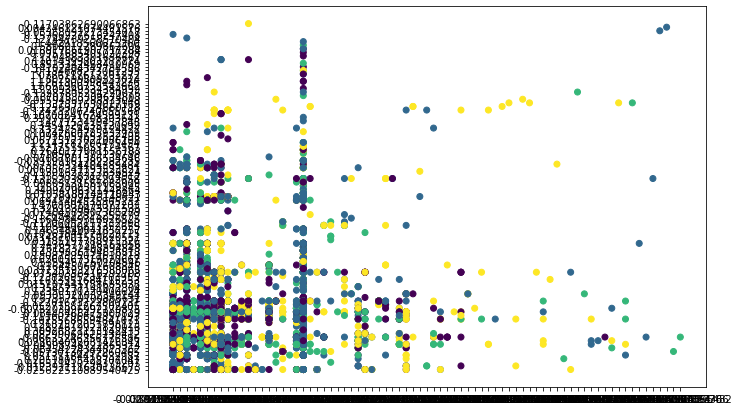

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['UnitPrice'], c=kmeans.labels_)

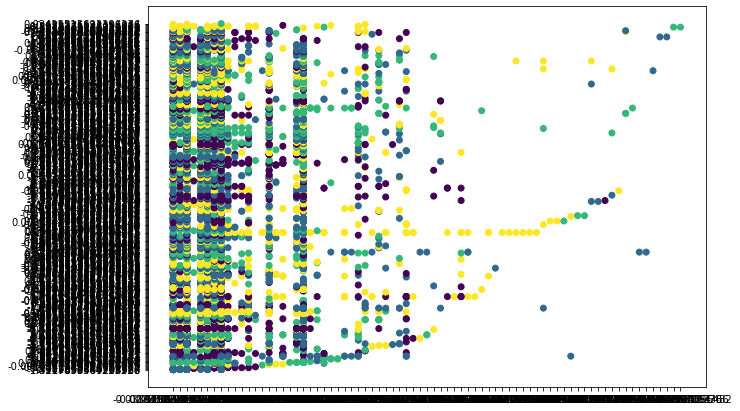

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['CustomerID'], c=kmeans.labels_)

with 2 clusters

In [16]:
#change n_clusters
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans_cluster = kmeans.fit(df)

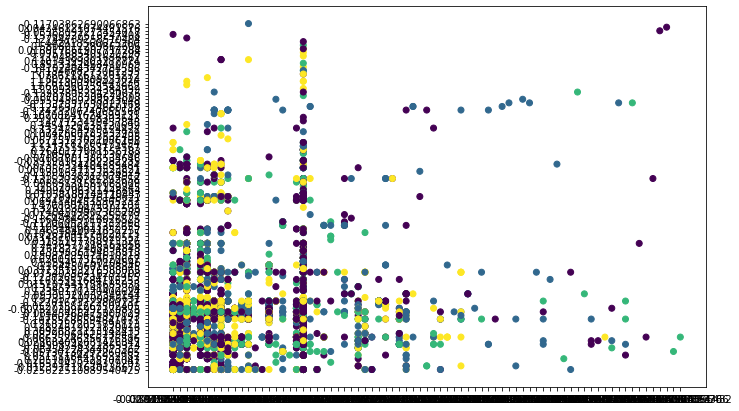

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['UnitPrice'], c=kmeans.labels_)

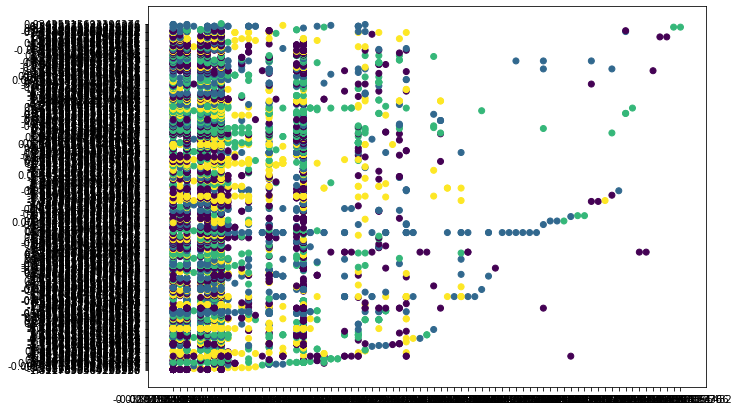

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['CustomerID'], c=kmeans.labels_)

## Hierarchical Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

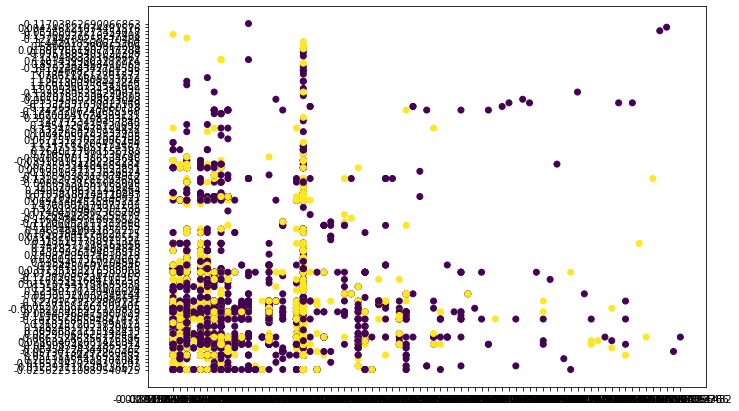

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['UnitPrice'], c=cluster.labels_)

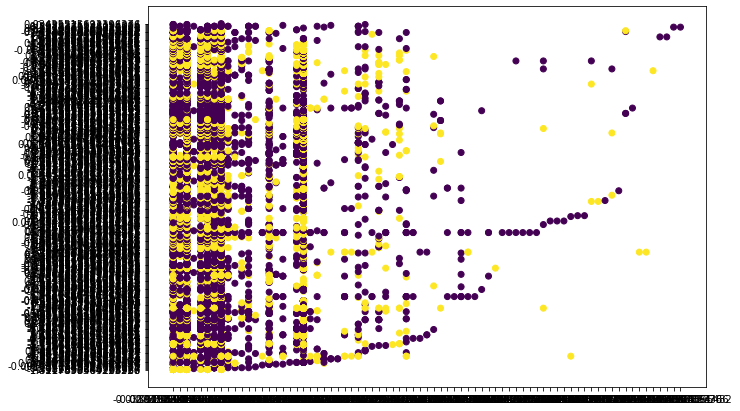

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Quantity'], df['CustomerID'], c=cluster.labels_)
